# Advanced Lane Finding

In [1]:
import numpy as np
import cv2

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

import os

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2


## Camera Calibration

| **CRITERIA** | **MEETS SPECIFICATIONS** |
|------|------|
| Briefly state how you computed the camera matrix and distortion coefficients. Provide an example of a distortion corrected calibration image. | OpenCV functions or other methods were used to calculate the correct camera matrix and distortion coefficients using the calibration chessboard images provided in the repository (note these are 9x6 chessboard images, unlike the 8x6 images used in the lesson). The distortion matrix should be used to un-distort one of the calibration images provided as a demonstration that the calibration is correct. Example of undistorted calibration image is Included in the writeup (or saved to a folder). |

In [2]:
import glob
from utils import calc_chessboards_corners, calibrate, undistort

# size of the used chessboards
num_x = 9
num_y = 6

images = glob.glob('./camera_cal/calibration*.jpg')
objpoints, imgpoints = calc_chessboards_corners(images, num_x, num_y)

calibration_mtx, calibration_dist = calibrate(plt.imread(images[0]), objpoints, imgpoints)

In [3]:
def visualize(origin_images, result_images, result_img_titles='Result Image', result_img_cmap=None):
    num_rows = len(origin_images)
    if not isinstance(result_img_titles, list):
        result_img_titles = [result_img_titles]*num_rows
    
    fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(20, num_rows*5))
    if num_rows == 1:
        axes = np.array([axes])
        
    for orig_img, result_img, result_title, plt_row in zip(origin_images, result_images, result_img_titles, axes):
        plt_row[0].set_title('Original Image ', size=24)
        plt_row[1].set_title(result_title, size=24)

        plt_row[0].imshow(orig_img)
        plt_row[1].imshow(result_img, cmap=result_img_cmap)

    plt.tight_layout()

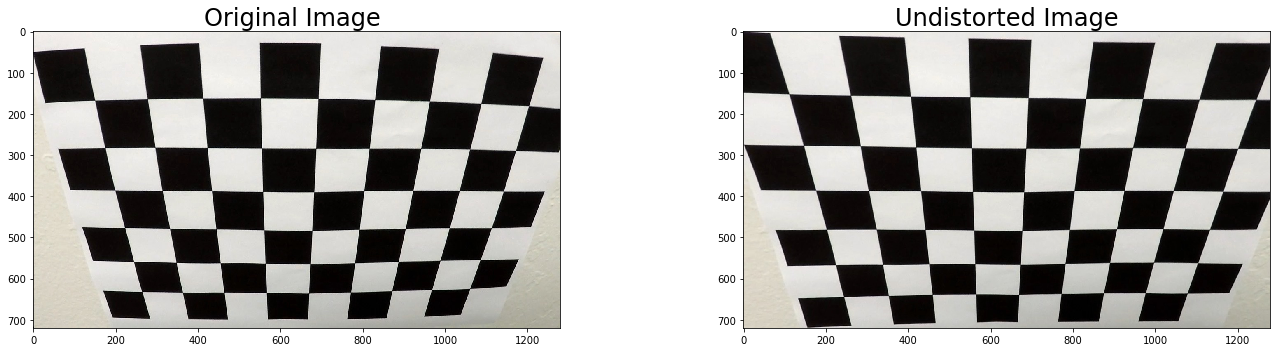

In [4]:
test_img = plt.imread('camera_cal/calibration2.jpg')
undist_test_img = undistort(test_img, calibration_mtx, calibration_dist)

visualize([test_img], [undist_test_img], 'Undistorted Image')

## Pipeline (test images)

| **CRITERIA** | **MEETS SPECIFICATIONS** |
|---|---|
| Provide an example of a distortion-corrected image.  | Distortion correction that was calculated via camera calibration has been correctly applied to each image. An example of a distortion corrected image should be included in the writeup (or saved to a folder) and submitted with the project.  |

In [5]:
test_fnames = [#'./test_images/straight_lines1.jpg', 
               './test_images/test1.jpg']
test_images = []
undist_test_images = []
for fname in test_fnames:
    img = plt.imread(fname)
    test_images.append(img)    
    
    undist_test_img = undistort(img, calibration_mtx, calibration_dist)
    undist_test_images.append(undist_test_img)

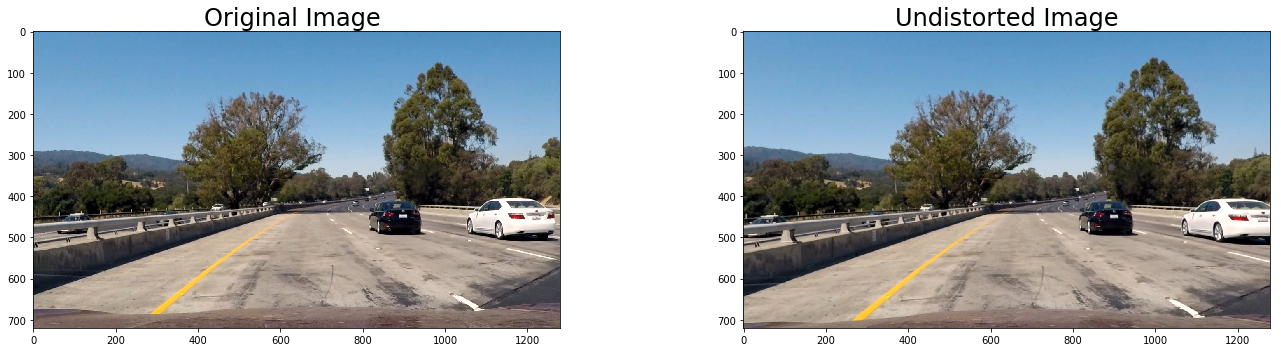

In [6]:
visualize(test_images, undist_test_images, 'Undistorted Image')

| **CRITERIA** | **MEETS SPECIFICATIONS** |
|---|---|
|Describe how (and identify where in your code) you used color transforms, gradients or other methods to create a thresholded binary image. Provide an example of a binary image result. |  A method or combination of methods (i.e., color transforms, gradients) has been used to create a binary image containing likely lane pixels. There is no "ground truth" here, just visual verification that the pixels identified as part of the lane lines are, in fact, part of the lines. Example binary images should be included in the writeup (or saved to a folder) and submitted with the project. |

In [7]:
# prepare test images
from utils import load_image

test_dir = './test_images/'
test_files = [
             #'straight_lines1.jpg', 'straight_lines2.jpg', 
             #'test1.jpg', 
             'test2.jpg', #'test3.jpg', 'test4.jpg', 'test5.jpg', 'test6.jpg', 
             #'challenge1.jpg',
             #'536.jpg', '539.jpg', '556.jpg', '1007.jpg', '1054.jpg',
             #'554.jpg',
             #'986.jpg',
             #'560.jpg', '997.jpg', '1023.jpg', '1015.jpg',
             #'1033.jpg', '1040.jpg',
             ]
test_imgs = []

for fname in test_files:
    test_imgs.append(undistort(load_image(os.path.join(test_dir, fname)), calibration_mtx, calibration_dist))

test_labels = test_files#['straight_lines1', 'straight_lines2', '1', '2', '3', '4', '5', '6', 'challenge1']

In [8]:
from threshold import threshold_image, threshold_origin_image

In [9]:
thresholded_imgs = []
gray_thresholded_imgs = []
for img in test_imgs:
    result = threshold_origin_image(img)
    thresholded_imgs.append(result)
    gray_thresholded_imgs.append(result[:,:,0])

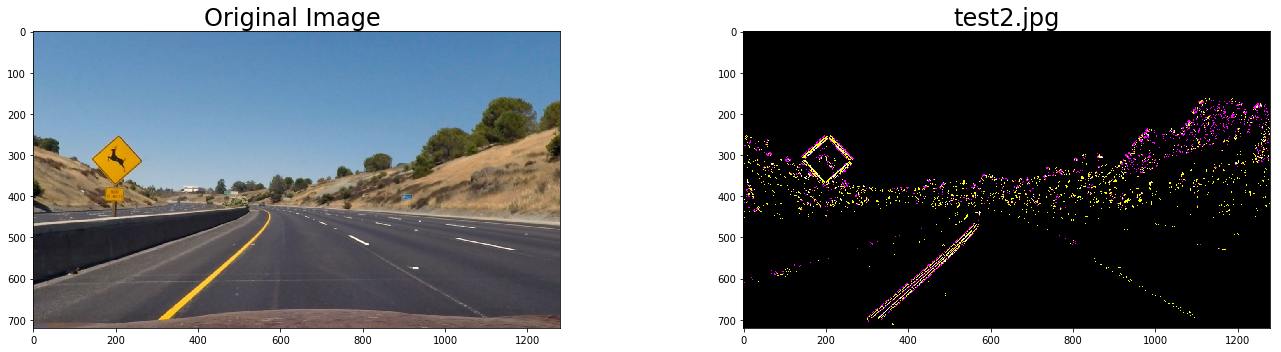

In [10]:
visualize(test_imgs, thresholded_imgs, test_labels)

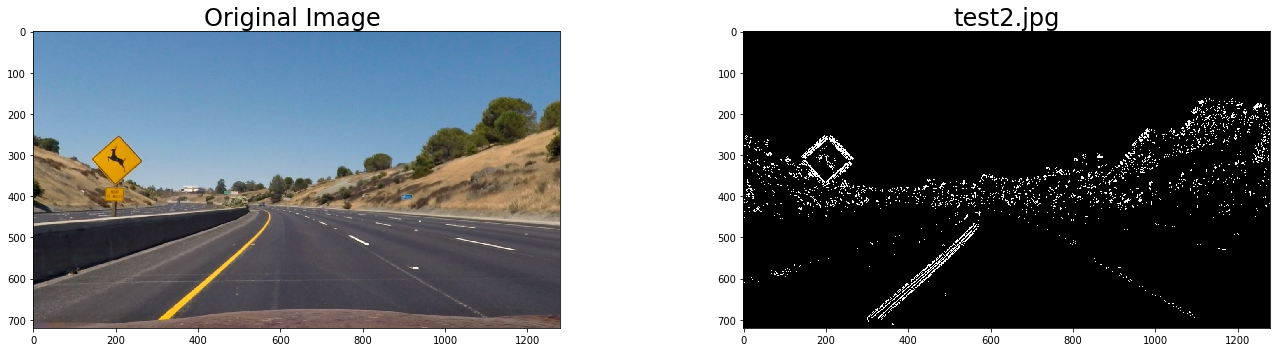

In [11]:
visualize(test_imgs, gray_thresholded_imgs, test_labels, result_img_cmap='gray')

| **CRITERIA** | **MEETS SPECIFICATIONS** |
|---|---|
| Describe how (and identify where in your code) you performed a perspective transform and provide an example of a transformed image.  | OpenCV function or other method has been used to correctly rectify each image to a "birds-eye view". Transformed images should be included in the writeup (or saved to a folder) and submitted with the project.  |

In [12]:
from utils import warp

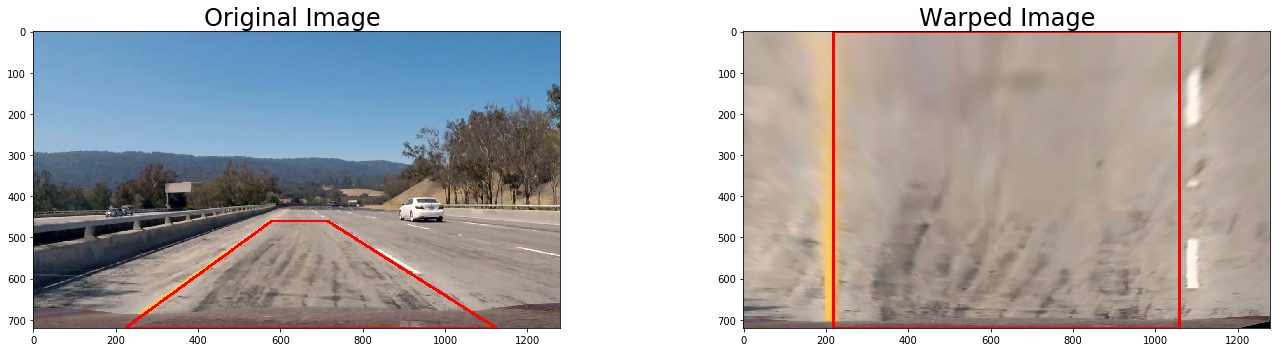

In [13]:
#test_img = np.copy(test_imgs[0])
test_img = load_image('./output_images/560.jpg')
img_size = (test_img.shape[1], test_img.shape[0])

src = np.float32([[(img_size[0] / 2) - 60, img_size[1] / 2 + 100],
                  [((img_size[0] / 6) + 10), img_size[1]],
                  [(img_size[0] * 5 / 6) + 60, img_size[1]],
                  [(img_size[0] / 2 + 75), img_size[1] / 2 + 100]])
dst = np.float32([[(img_size[0] / 4)-100, 0],
                  [(img_size[0] / 4)-100, img_size[1]],
                  [(img_size[0] * 3 / 4)+100, img_size[1]],
                  [(img_size[0] * 3 / 4)+100, 0]])

M = cv2.getPerspectiveTransform(src, dst)
MInv = cv2.getPerspectiveTransform(dst, src)
warped_test_img = warp(test_img, M)

color = [255, 0, 0]
thickness = 5
cv2.polylines(test_img, np.int32([src]), 1, color, thickness)
cv2.polylines(warped_test_img, np.int32([dst]), 1, color, thickness)


visualize([test_img], [warped_test_img], 'Warped Image')

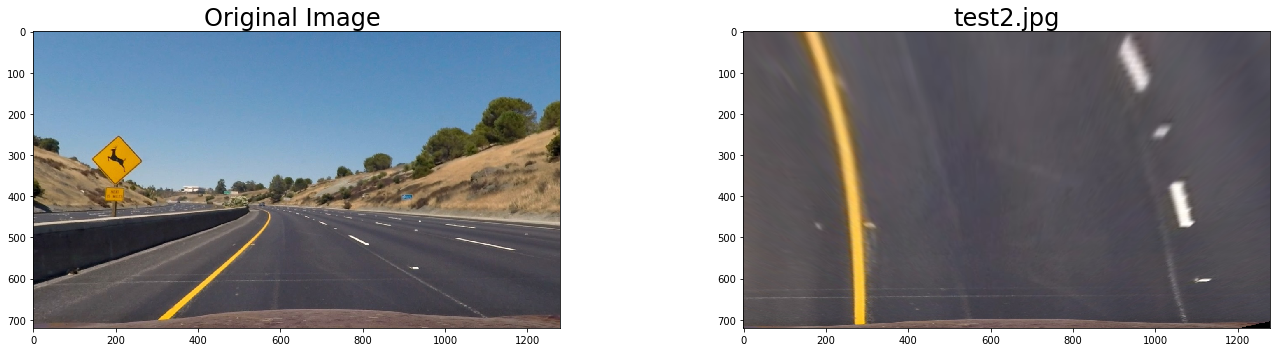

In [14]:
warped_orig_imgs = []
for img in test_imgs:
    warped_orig_imgs.append(warp(img, M))
    
visualize(test_imgs, warped_orig_imgs, test_labels)

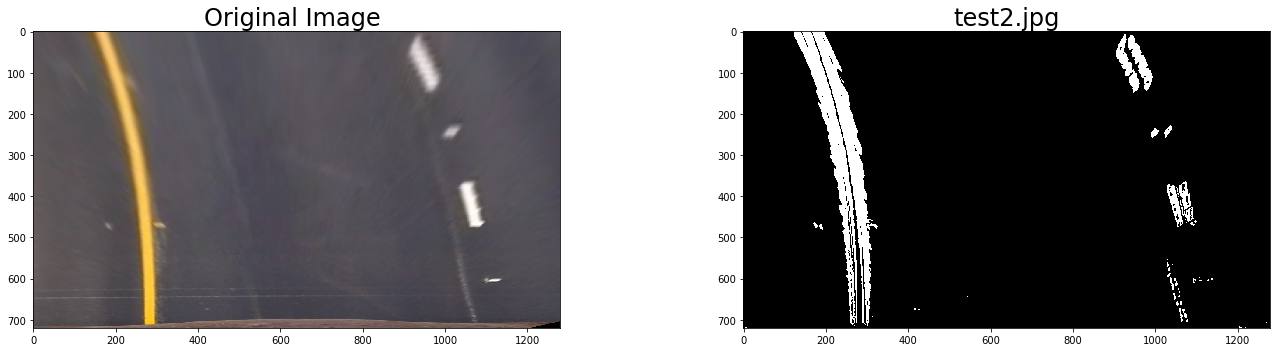

In [15]:
warped_imgs = []
for img, warped_img in zip(test_imgs, warped_orig_imgs):
    warped_imgs.append(threshold_image(warped_img)[:,:,0])

    
visualize(warped_orig_imgs, warped_imgs, test_labels, result_img_cmap='gray')

| **CRITERIA** | **MEETS SPECIFICATIONS** |
|---|---|
| Describe how (and identify where in your code) you identified lane-line pixels and fit their positions with a polynomial? | Methods have been used to identify lane line pixels in the rectified binary image. The left and right line have been identified and fit with a curved functional form (e.g., spine or polynomial). Example images with line pixels identified and a fit overplotted should be included in the writeup (or saved to a folder) and submitted with the project. |

(720, 0)

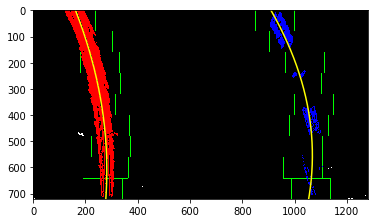

In [16]:
from LaneLinesFinder import find_lane_lines, generate_fit_coords

test_idx = 0

warped_img = warped_imgs[test_idx]
#print(warped_img.shape)
#warped_img = warped_imgs2[test_idx]

out_img, left_fit, right_fit = find_lane_lines(warped_img)

out_img = out_img.astype(np.uint8)
plt.imshow(out_img)


# Generate x and y values for plotting
ploty, left_fitx, right_fitx = generate_fit_coords(warped_img, left_fit, right_fit)

plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')
plt.xlim(0, 1280)
plt.ylim(720, 0)

(720, 0)

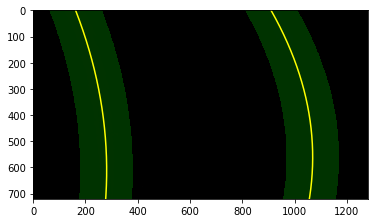

In [17]:
from LaneLinesFinder import optimized_find_lane_lines
# test optimized version
out_img, left_fit, right_fit = optimized_find_lane_lines(warped_img, left_fit, right_fit)
plt.imshow(out_img)

# Generate x and y values for plotting
ploty, left_fitx, right_fitx = generate_fit_coords(warped_img, left_fit, right_fit)

plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')
plt.xlim(0, 1280)
plt.ylim(720, 0)

| **CRITERIA** | **MEETS SPECIFICATIONS** |
|---|---|
| Describe how (and identify where in your code) you calculated the radius of curvature of the lane and the position of the vehicle with respect to center. | Here the idea is to take the measurements of where the lane lines are and estimate how much the road is curving and where the vehicle is located with respect to the center of the lane. The radius of curvature may be given in meters assuming the curve of the road follows a circle. For the position of the vehicle, you may assume the camera is mounted at the center of the car and the deviation of the midpoint of the lane from the center of the image is the offset you're looking for. As with the polynomial fitting, convert from pixels to meters. |

| **CRITERIA** | **MEETS SPECIFICATIONS** |
|---|---|
| Provide an example image of your result plotted back down onto the road such that the lane area is identified clearly. | The fit from the rectified image has been warped back onto the original image and plotted to identify the lane boundaries. This should demonstrate that the lane boundaries were correctly identified. An example image with lanes, curvature, and position from center should be included in the writeup (or saved to a folder) and submitted with the project. |

In [18]:
from utils import unwarp

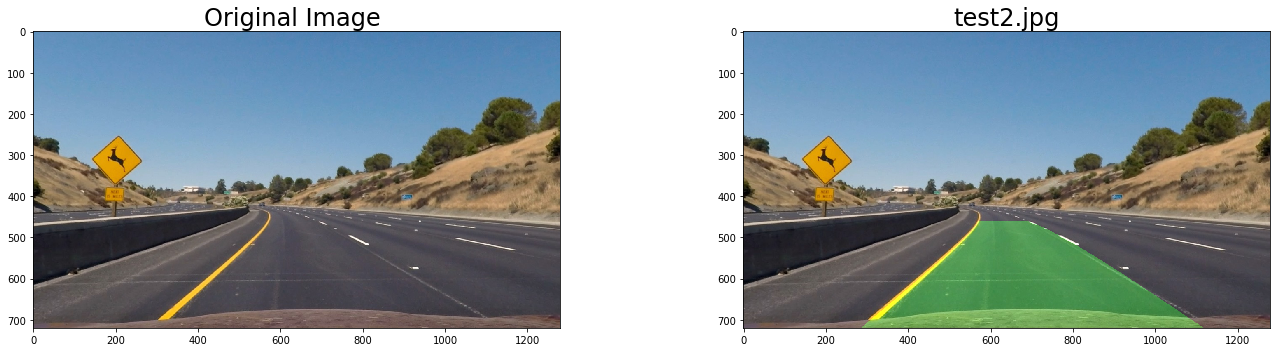

In [19]:
result_imgs = []
for ind, img, warped_img in zip(range(len(test_imgs)), test_imgs, warped_imgs):
    out_img, left_fit, right_fit = find_lane_lines(warped_img)

    # Generate x and y values for plotting
    ploty = np.linspace(0, warped_img.shape[0] - 1, warped_img.shape[0])
    left_fitx = left_fit[0] * ploty ** 2 + left_fit[1] * ploty + left_fit[2]
    right_fitx = right_fit[0] * ploty ** 2 + right_fit[1] * ploty + right_fit[2]

    result = unwarp(img, MInv, ploty, left_fitx, right_fitx)
    plt.imsave(os.path.join('out', '{0}.png'.format(ind)), result)
    result_imgs.append(result)
                    
visualize(test_imgs, result_imgs, test_labels)    

## Pipeline (video)

| **CRITERIA** | **MEETS SPECIFICATIONS** |
|---|---|
| Provide a link to your final video output. Your pipeline should perform reasonably well on the entire project video (wobbly lines are ok but no catastrophic failures that would cause the car to drive off the road!) | The image processing pipeline that was established to find the lane lines in images successfully processes the video. The output here should be a new video where the lanes are identified in every frame, and outputs are generated regarding the radius of curvature of the lane and vehicle position within the lane. The pipeline should correctly map out curved lines and not fail when shadows or pavement color changes are present. The output video should be linked to in the writeup and/or saved and submitted with the project. |

In [20]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

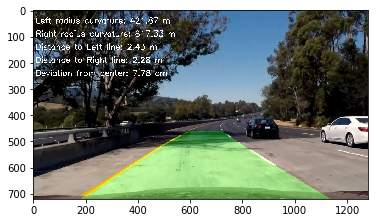

In [21]:
from LaneLinesFinder import LaneLinesFinder

#test_img = plt.imread('./test_images/straight_lines1.jpg')
#test_img = plt.imread('./test_images/straight_lines2.jpg')
#test_img = plt.imread('./test_images/test1.jpg')
#test_img = plt.imread('./test_images/challenge1.jpg')
#test_img = plt.imread('./test_images/554.jpg')
#test_img = plt.imread('./test_images/986.jpg')
#test_img = plt.imread('./test_images/563.jpg')
#test_img = plt.imread('./test_images/560.jpg')
#test_img = plt.imread('./test_images/997.jpg')
#test_img = plt.imread('./test_images/1023.jpg')
test_img = plt.imread('./test_images/1033.jpg')

finder = LaneLinesFinder(objpoints, imgpoints, src, dst)
#result = finder.process_image(test_img)
result = finder.process_image(test_img)
plt.imshow(result)
plt.imsave('2.png', result)

In [22]:
output1 = 'project_video_out.mp4'
clip1 = VideoFileClip("project_video.mp4")

finder = LaneLinesFinder(objpoints, imgpoints, src, dst)
out_clip1 = clip1.fl_image(finder.process_image)

%time out_clip1.write_videofile(output1, audio=False)

[MoviePy] >>>> Building video project_video_out.mp4
[MoviePy] Writing video project_video_out.mp4


100%|█████████▉| 1260/1261 [09:54<00:00,  2.40it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video_out.mp4 

CPU times: user 14min 5s, sys: 3.4 s, total: 14min 8s
Wall time: 9min 55s


In [23]:
output2 = 'challenge_video_out.mp4'
clip2 = VideoFileClip("challenge_video.mp4")

finder2 = LaneLinesFinder(objpoints, imgpoints, src, dst)
out_clip2 = clip2.fl_image(finder2.process_image)

%time out_clip2.write_videofile(output2, audio=False)

[MoviePy] >>>> Building video challenge_video_out.mp4
[MoviePy] Writing video challenge_video_out.mp4


100%|██████████| 485/485 [04:20<00:00,  2.57it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: challenge_video_out.mp4 

CPU times: user 6min 12s, sys: 1.82 s, total: 6min 14s
Wall time: 4min 21s


## Discussion

| **CRITERIA** | **MEETS SPECIFICATIONS** |
|---|---|
| Briefly discuss any problems / issues you faced in your implementation of this project. Where will your pipeline likely fail? What could you do to make it more robust? | Discussion includes some consideration of problems/issues faced, what could be improved about their algorithm/pipeline, and what hypothetical cases would cause their pipeline to fail. |

## Suggestions to Make Your Project Stand Out!

For a standout submission, you should follow the suggestion in the lesson to not just search blindly for the lane lines in each frame of video, but rather, once you have a high-confidence detection, use that to inform the search for the position of the lines in subsequent frames of video. For example, if a polynomial fit was found to be robust in the previous frame, then rather than search the entire next frame for the lines, just a window around the previous detection could be searched. This will improve speed and provide a more robust method for rejecting outliers.

For an additional improvement you should implement outlier rejection and use a low-pass filter to smooth the lane detection over frames, meaning add each new detection to a weighted mean of the position of the lines to avoid jitter.

If you really want to go above and beyond, implement these methods on the challenge videos as well, or on your own videos you've recorded yourself.
